# Homework 1

In [27]:
library(Stat2Data)
library(lattice)
library(psych)
library(mosaic)
library(ggplot2)

In [2]:
data(BaseballTimes)
head(BaseballTimes)

Game,League,Runs,Margin,Pitchers,Attendance,Time
CLE-DET,AL,14,6,6,38774,168
CHI-BAL,AL,11,5,5,15398,164
BOS-NYY,AL,10,4,11,55058,202
TOR-TAM,AL,8,4,10,13478,172
TEX-KC,AL,3,1,4,17004,151
OAK-LAA,AL,6,4,4,37431,133


## Problem 1.27

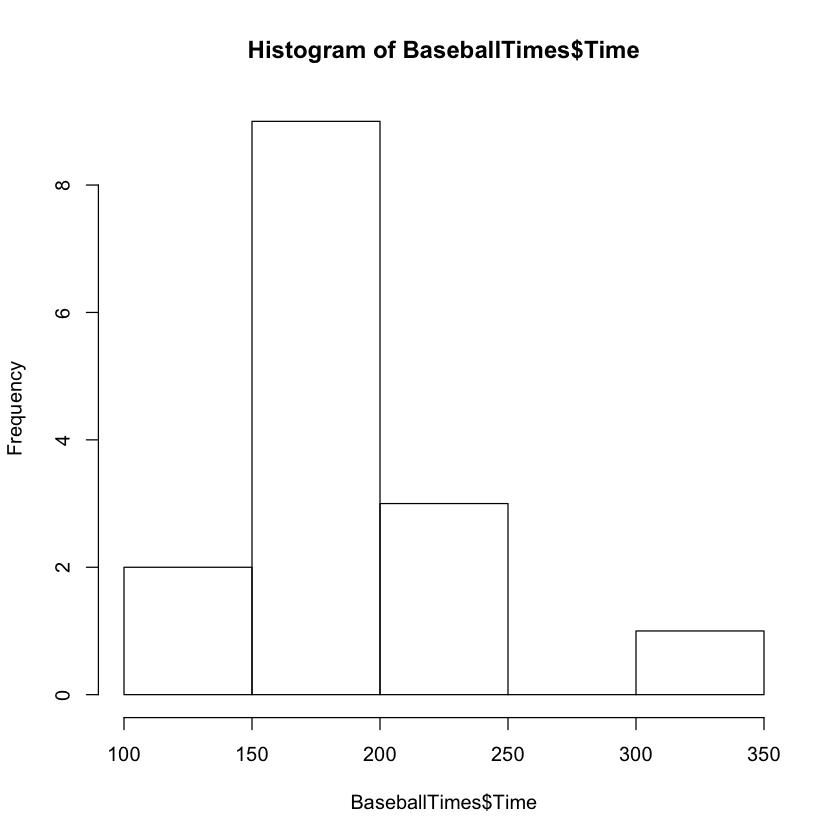

In [3]:
hist(BaseballTimes$Time)

### a.1) The distribution is right skewed (you can see that there is positive skew in the summary stats below)

In [4]:
describe(BaseballTimes)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Game*,1,15,8.000000,4.472136e+00,8,8.000000,5.9304,1,15,14,0.0000000,-1.4413333,1.1547005
League*,2,15,1.533333,5.163978e-01,2,1.538462,0.0000,1,2,1,-0.1204928,-2.1133333,0.1333333
Runs,3,15,10.133333,5.914470e+00,10,9.692308,5.9304,3,23,20,0.5484525,-0.6484896,1.5271095
Margin,4,15,3.866667,3.090693e+00,4,3.461538,4.4478,1,12,11,0.9970121,0.5823349,0.7980134
Pitchers,5,15,8.200000,3.858201e+00,7,7.923077,4.4478,4,16,12,0.5198489,-1.0995397,0.9961832
Attendance,6,15,29768.800000,1.227933e+04,30395,29076.615385,15902.3676,13478,55058,41580,0.3449801,-1.0221847,3170.5087112
Time,7,15,182.666667,4.620554e+01,168,176.153846,25.2042,133,317,184,1.5983669,2.0755231,11.9302204


### a.2) Below is the outlier

In [5]:
# Get the indices of all rows where the Time column has a value > 300
# Pass that to the index operator [] and you'll get just the rows for those indices
# You can pass a vector of column names as the second argument to the index operator ([])
# if you want only those columns, as it is we get all columns back 
BaseballTimes[(BaseballTimes$Time > 300), ]

,Game,League,Runs,Margin,Pitchers,Attendance,Time
15,NYM-PHI,NL,15,1,16,45204,317


### a.3) My explanation is that since there was a margin of 1, it is possible that they went into extra innings and the game only ended once one of the teams scored (which happened to take a decent amount of time). Also, Pitchers would explain it as well because it takes game time to switch out pitchers 

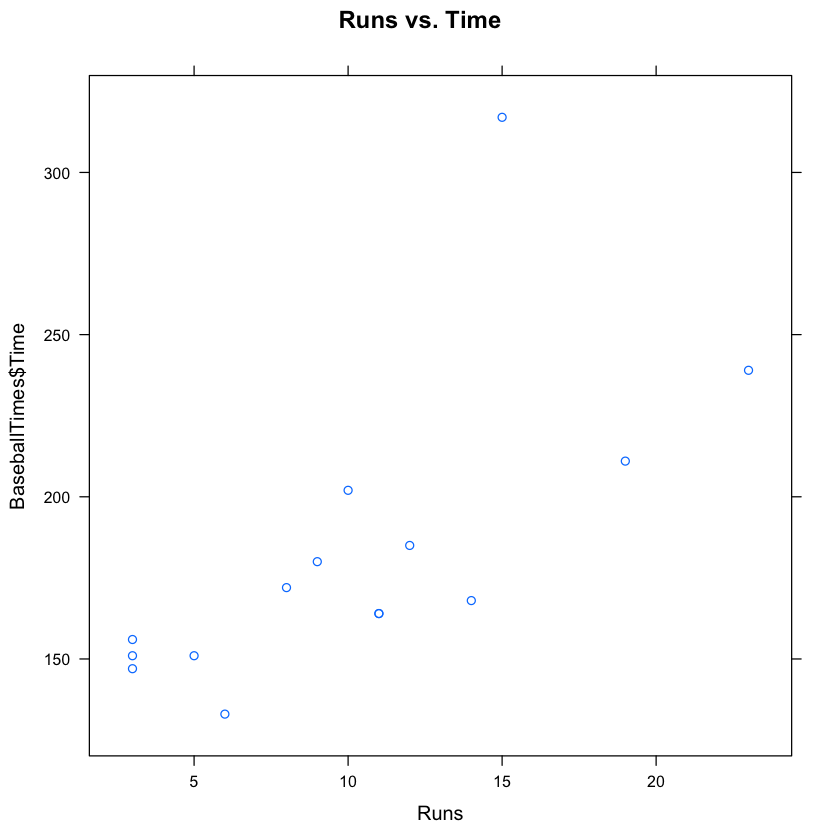

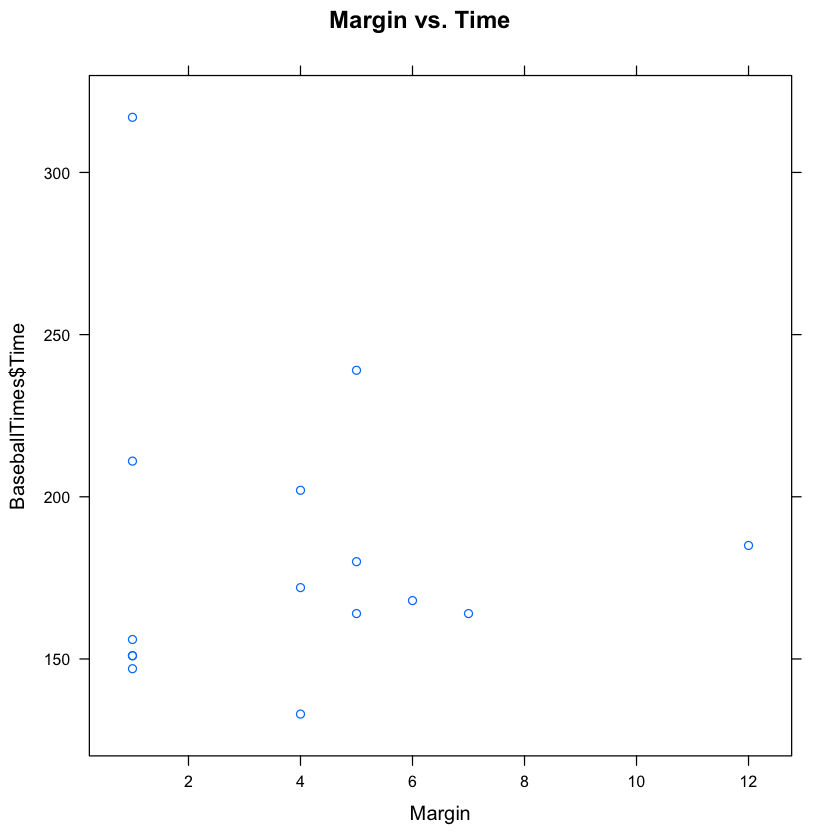

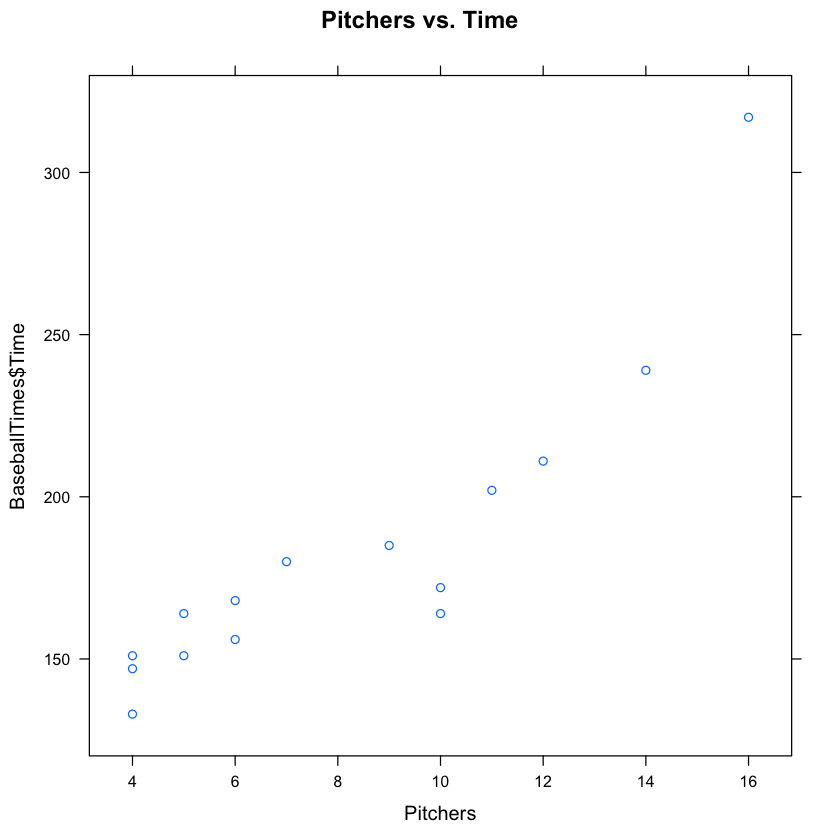

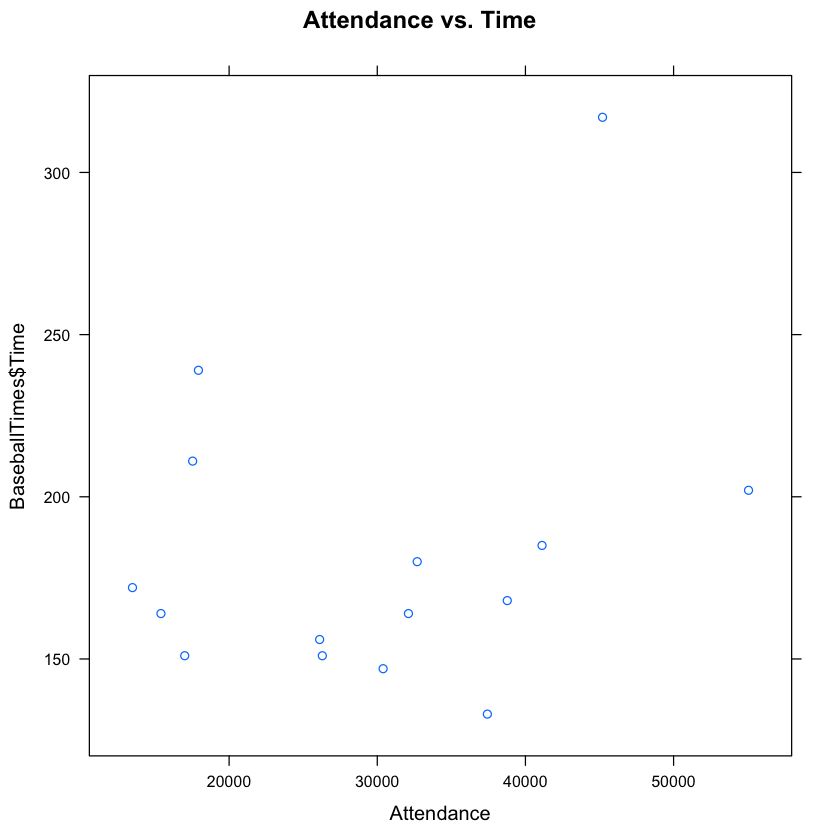

In [6]:
# xyplot(BaseballTimes$Time ~ BaseballTimes$Pitchers, main='Pitchers vs Time')
columns = colnames(BaseballTimes)
par(mfrow=c(1,3))
par(pin=c(2,2))
for(col in columns) {
    if(class(BaseballTimes[[col]]) == 'integer' && col != 'Time') {
        print(xyplot(BaseballTimes$Time ~ BaseballTimes[[col]], 
              main=paste(col, 'vs. Time'), xlab=col))
    }
}
# print(cor(BaseballTimes$Time, BaseballTimes$Pitchers))

### b) The best predictor seems to be the Pitchers field because it is linear and there is a strong positive, relatively linear association

In [7]:
pitchersTimeLm = lm(BaseballTimes$Time ~ BaseballTimes$Pitchers)
pitchersTimeLm


Call:
lm(formula = BaseballTimes$Time ~ BaseballTimes$Pitchers)

Coefficients:
           (Intercept)  BaseballTimes$Pitchers  
                 94.84                   10.71  


# c) Regression equation: $\hat{y} = 94.84 + 10.71x$
# The slope coefficient means that time will increase by 10.71 minutes per Pitcher change. The intercept means that if no pitchers switched in the game, then the game would last on average 94.84 minutes

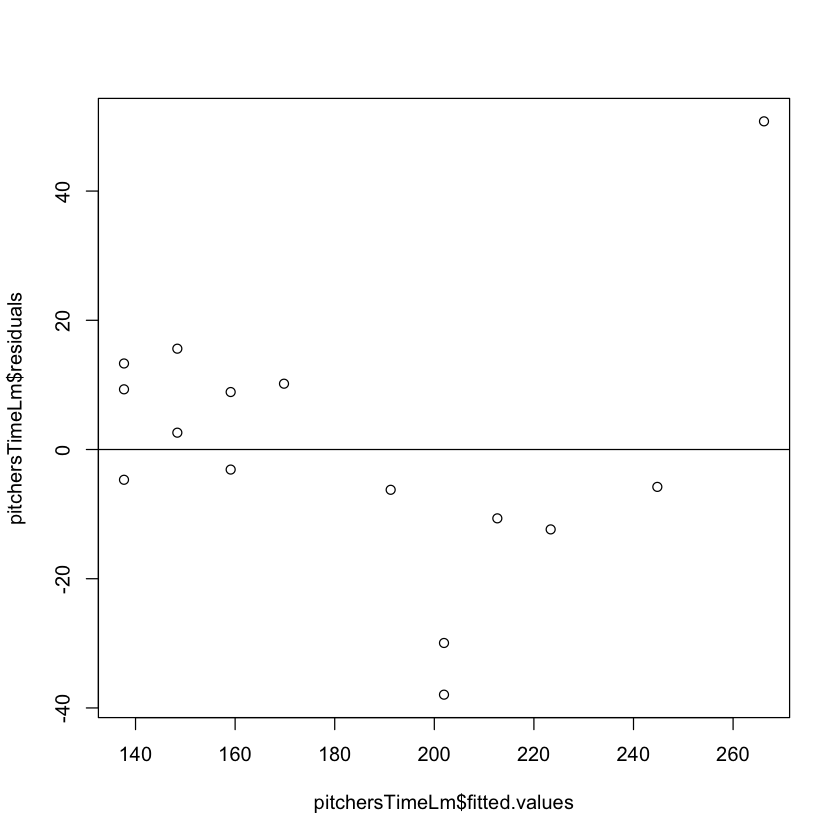

In [8]:
plot(pitchersTimeLm$fitted.values, pitchersTimeLm$residuals)
abline(h=0)

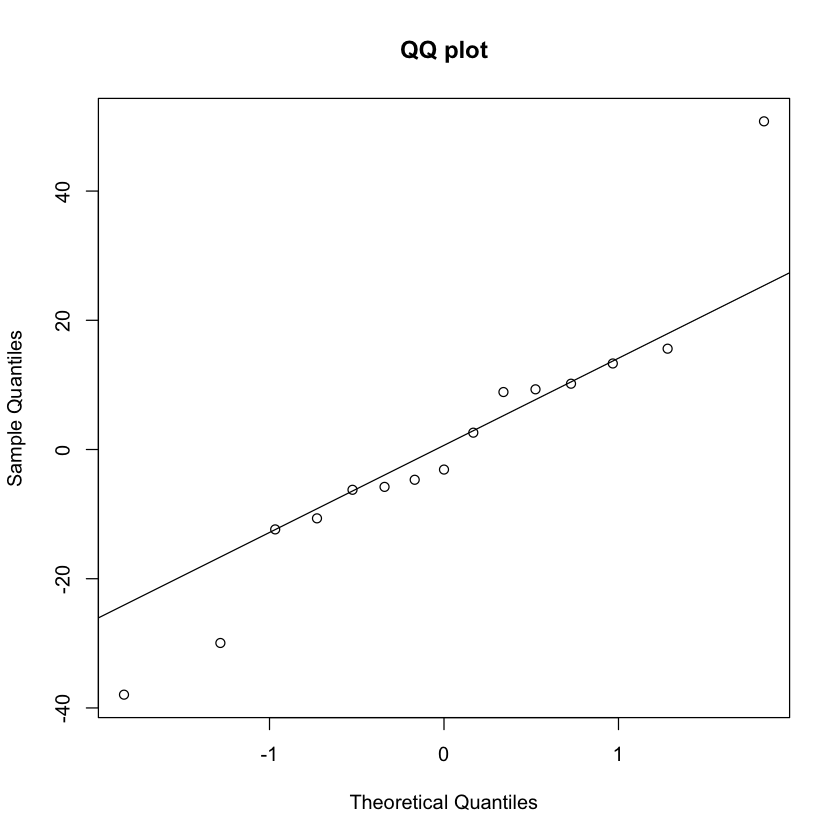

In [9]:
qqnorm(pitchersTimeLm$residuals, main='QQ plot')
qqline(pitchersTimeLm$residuals)

### d) The tails of the QQ plot do not follow the normal line. So we can conclude that the normality condition for the residuals is not met. The fitted vs residuals plot indicates a zero mean on the residuals. 

## Problem 1.28

### a) The outlier found in problem 1.27 also has the largest residual for the model used in problem 1.27 

In [10]:
BaseballTimes$Id <- seq.int(nrow(BaseballTimes))

In [11]:
BaseballTimes <- BaseballTimes[ !(BaseballTimes$Id %in% c(15)), ]

In [12]:
BaseballTimes

Game,League,Runs,Margin,Pitchers,Attendance,Time,Id
CLE-DET,AL,14,6,6,38774,168,1
CHI-BAL,AL,11,5,5,15398,164,2
BOS-NYY,AL,10,4,11,55058,202,3
TOR-TAM,AL,8,4,10,13478,172,4
TEX-KC,AL,3,1,4,17004,151,5
OAK-LAA,AL,6,4,4,37431,133,6
MIN-SEA,AL,5,1,5,26292,151,7
CHI-PIT,NL,23,5,14,17929,239,8
LAD-WAS,NL,3,1,6,26110,156,9
FLA-ATL,NL,19,1,12,17539,211,10


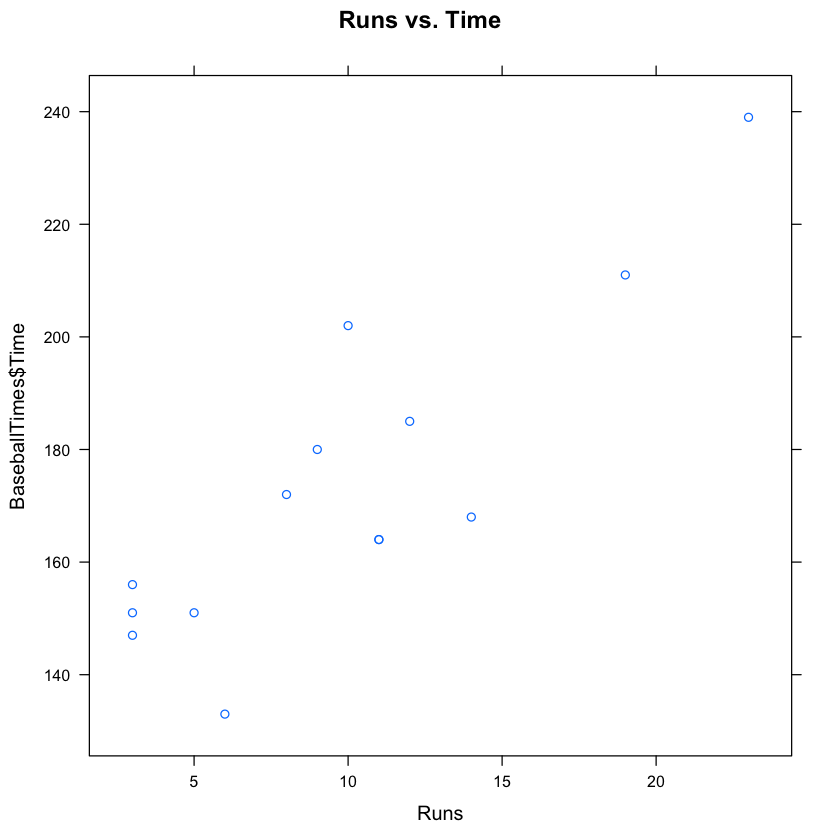

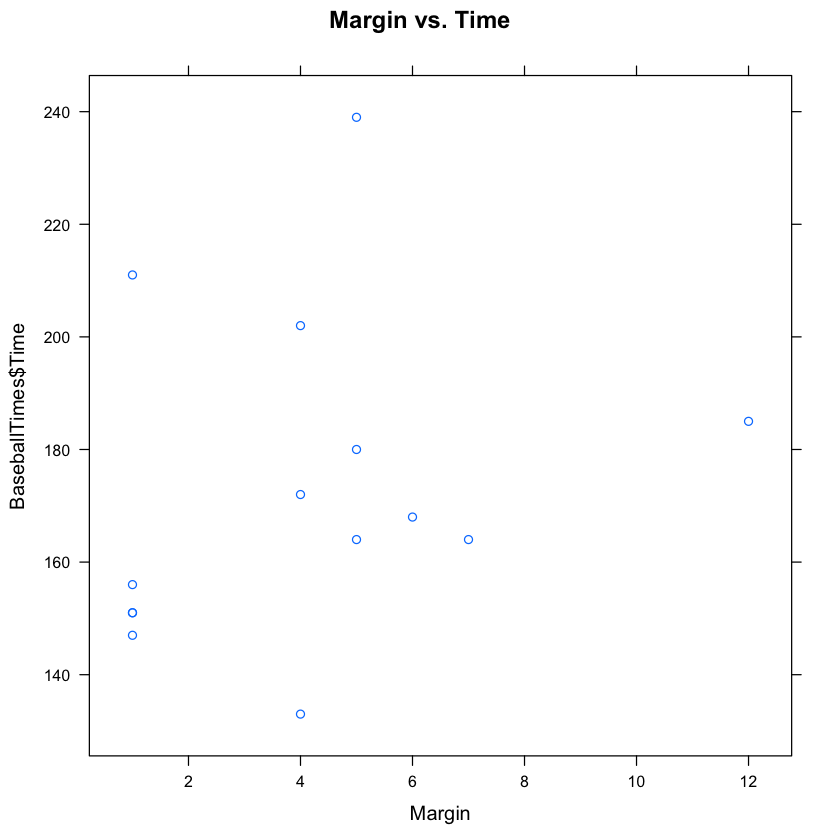

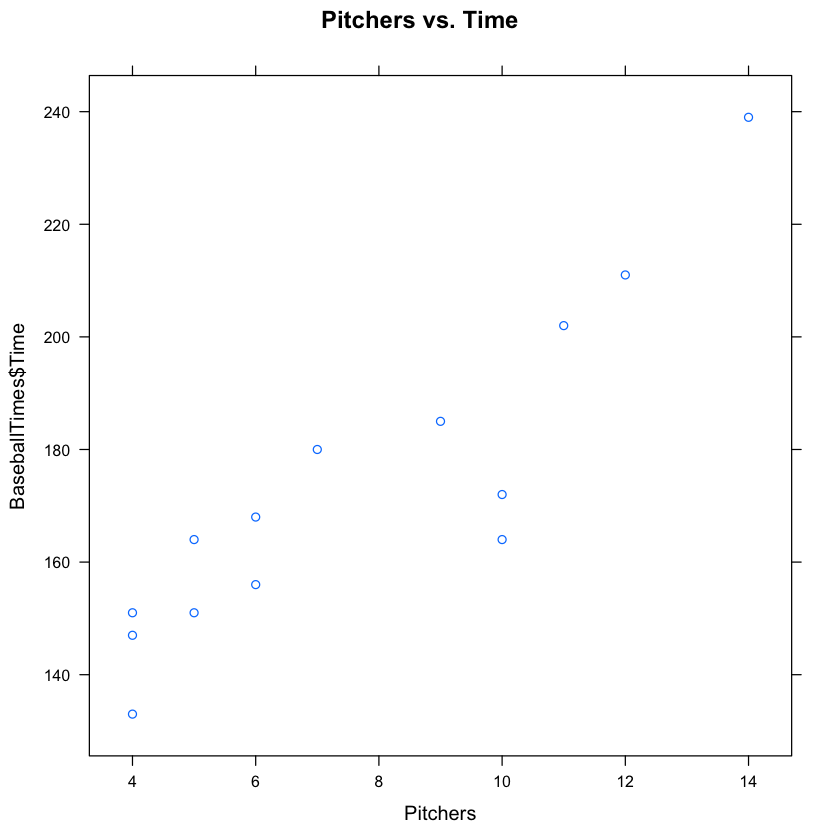

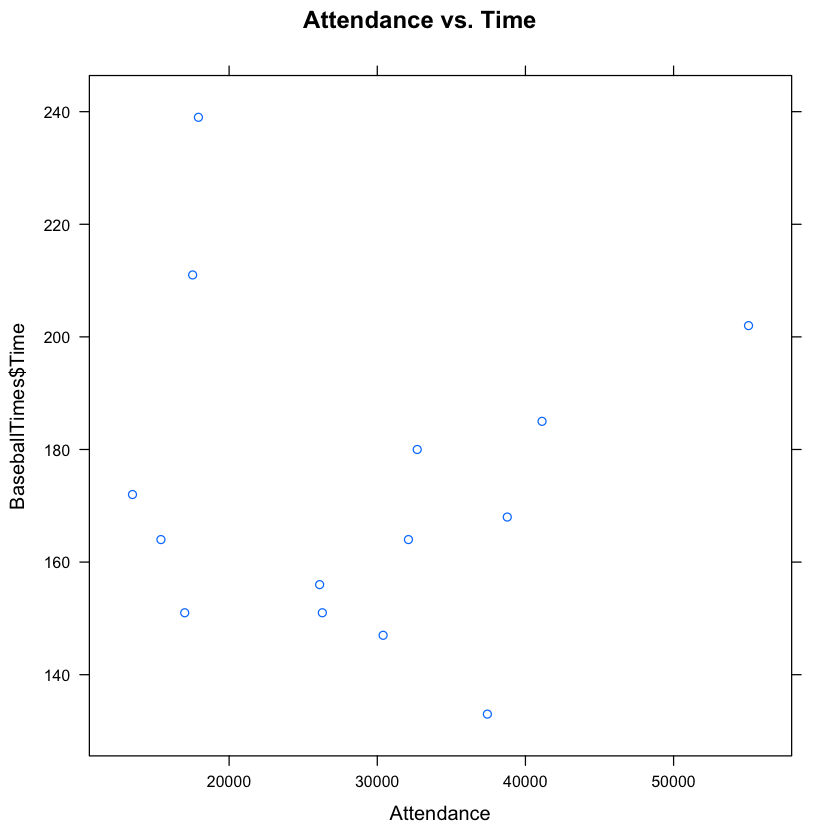

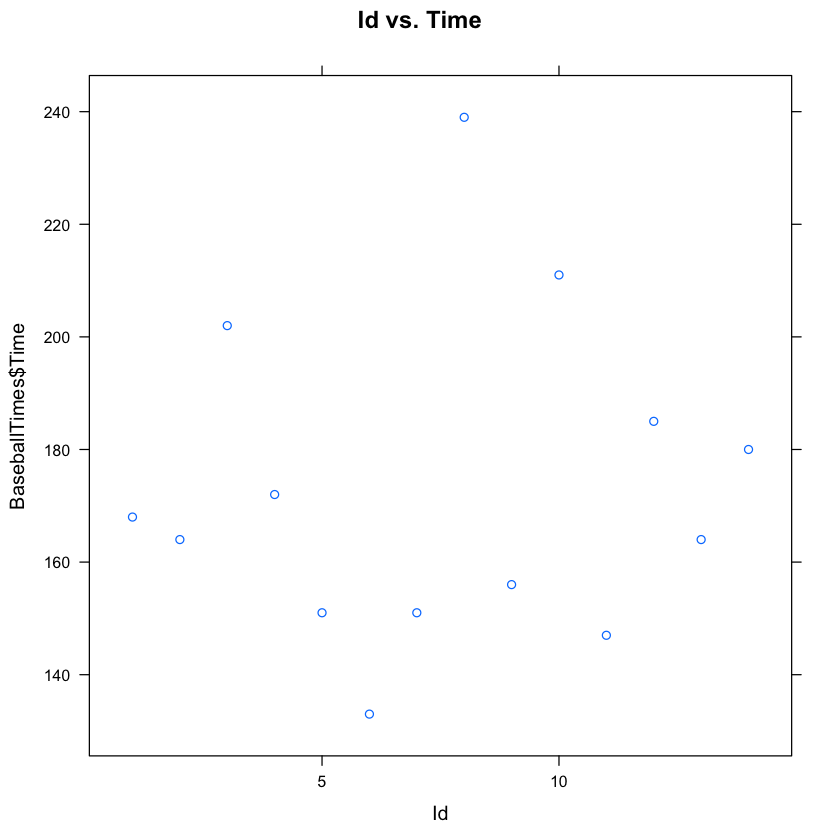

In [13]:
columns = colnames(BaseballTimes)
par(mfrow=c(1,3))
par(pin=c(2,2))
for(col in columns) {
    if(class(BaseballTimes[[col]]) == 'integer' && col != 'Time') {
        print(xyplot(BaseballTimes$Time ~ BaseballTimes[[col]], 
              main=paste(col, 'vs. Time'), xlab=col))
    }
}

In [14]:
pitchersTimeLm = lm(BaseballTimes$Time ~ BaseballTimes$Pitchers)
pitchersTimeLm


Call:
lm(formula = BaseballTimes$Time ~ BaseballTimes$Pitchers)

Coefficients:
           (Intercept)  BaseballTimes$Pitchers  
               113.869                   7.746  


# c) Regression equation: $\hat{y} = 113.86 + 7.746x$
# The slope coefficient means that time will increase by 7.746 minutes per Pitcher change. The intercept means that if no pitchers switched in the game, then the game would last on average 113.86 minutes

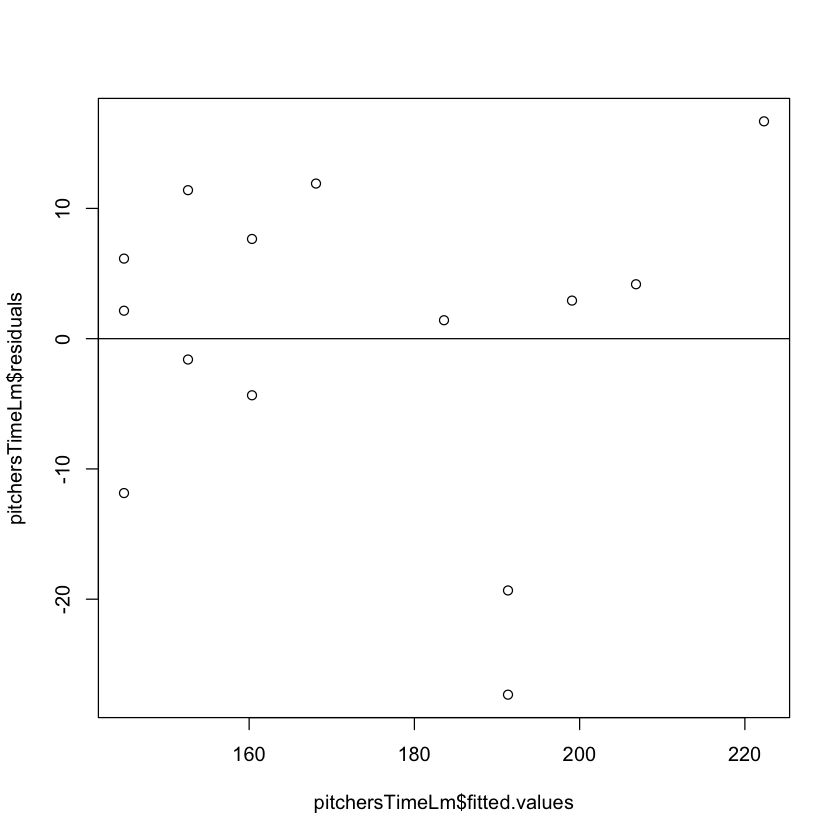

In [15]:
plot(pitchersTimeLm$fitted.values, pitchersTimeLm$residuals)
abline(h=0)

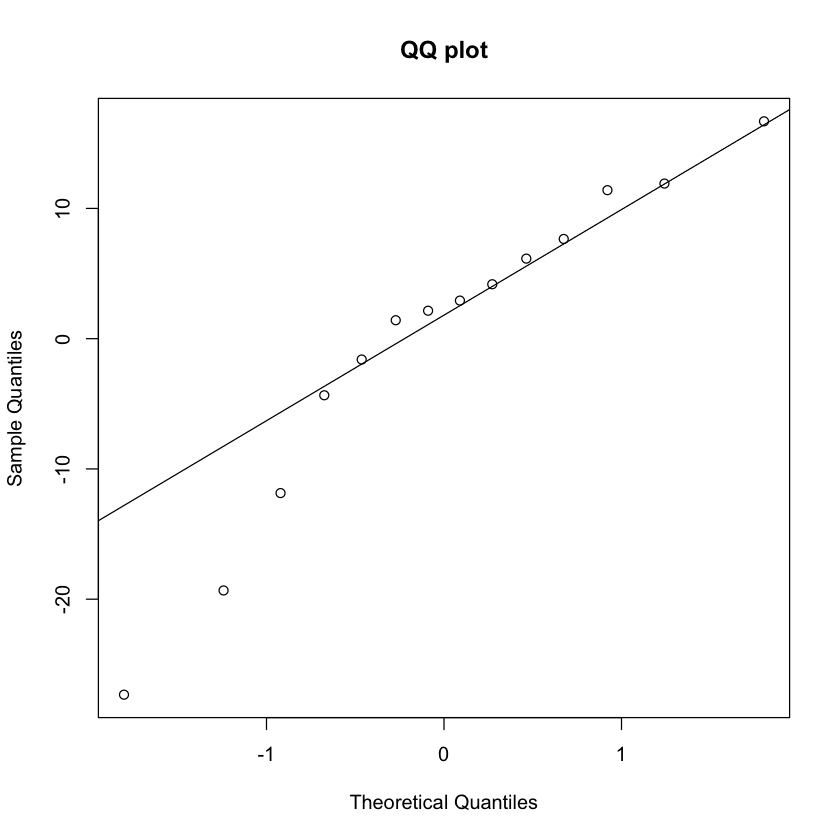

In [16]:
qqnorm(pitchersTimeLm$residuals, main='QQ plot')
qqline(pitchersTimeLm$residuals)

### b/c) Omitting the outlier made the plot of Pitcher vs Time more linear. The Residuals vs Fit plot shows roughly zero mean for the residuals. However, the QQ plot is still not following the normal line. Therefore, we cannot accept this analysis has questionable validity 

### Start of Homework 1.2 stuff

### Problem 1.12

In [20]:
data(Caterpillars)

In [21]:
ctp = Caterpillars

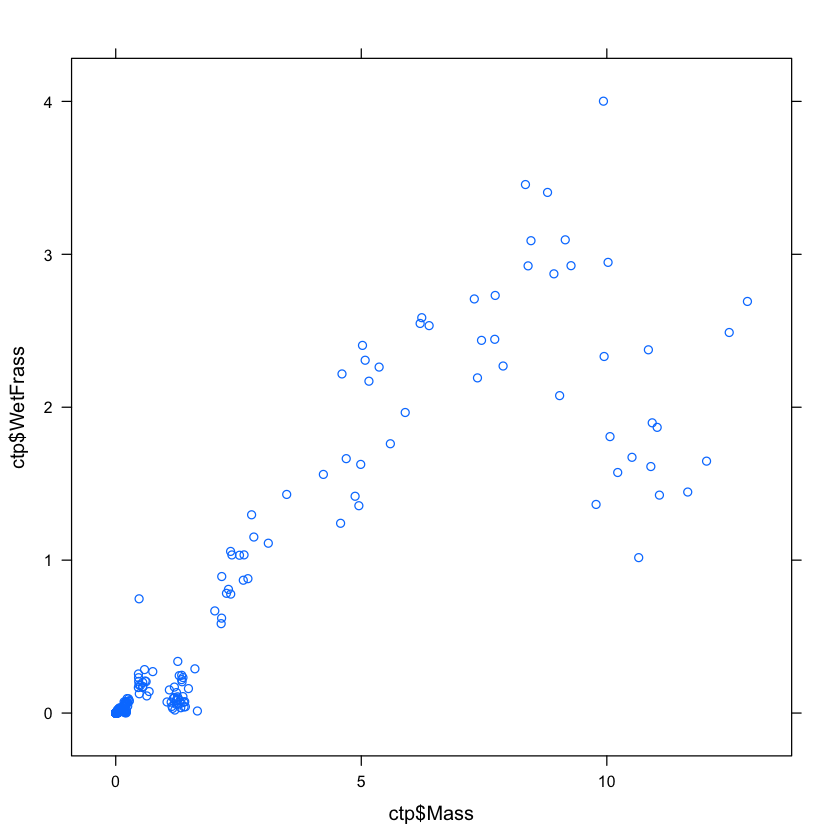

In [23]:
xyplot(ctp$WetFrass ~ ctp$Mass)

### It seems linear up to mass = 10, but then the pattern is more of a polynomial. Also it seems that mass and the wetfrass could be log transformed given the large cluster of points at lower mass and wetfrass values

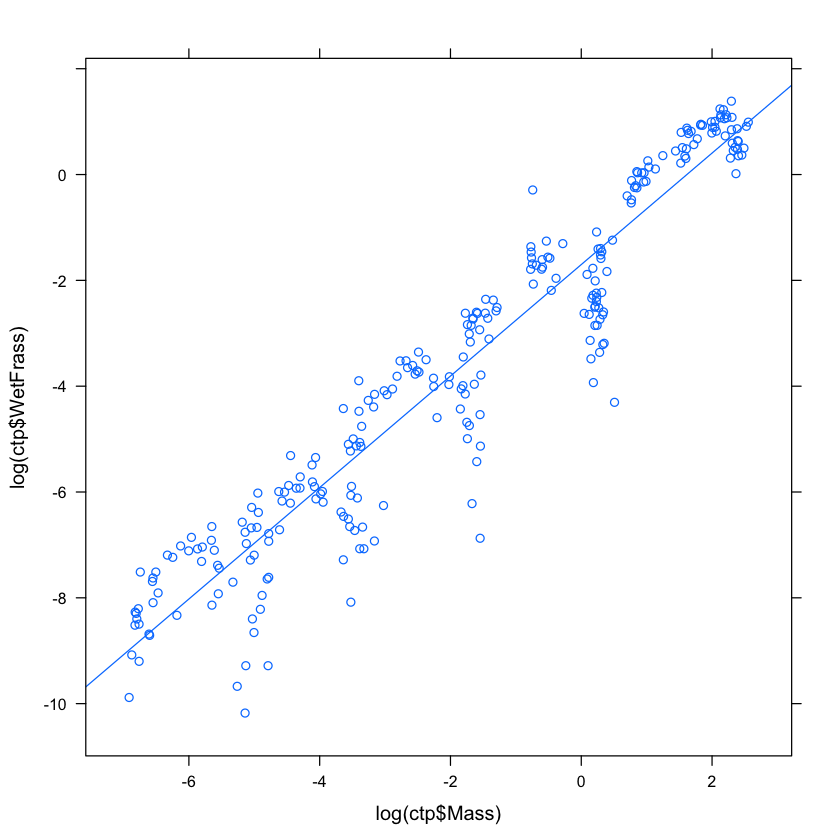

In [33]:
xyplot(log(ctp$WetFrass) ~ log(ctp$Mass), type=c('p', 'r'))

### The pattern is much more linear but there are stacks of points below the more linear part of the line. They seem more or less equal distance in x direction from each other. I would prefer this model as compared to the first

In [26]:
massWetFrassLm = lm(log(ctp$WetFrass) ~ log(ctp$Mass))
summary(massWetFrassLm)


Call:
lm(formula = log(ctp$WetFrass) ~ log(ctp$Mass))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5442 -0.4751  0.3511  0.6691  2.1913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.70072    0.06854  -24.81   <2e-16 ***
log(ctp$Mass)  1.05361    0.02054   51.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9416 on 265 degrees of freedom
Multiple R-squared:  0.9085,	Adjusted R-squared:  0.9082 
F-statistic:  2632 on 1 and 265 DF,  p-value: < 2.2e-16


### Prediction Equation: $\log_{e}(\hat{wetFrass}) = \beta_0 + \beta_1 \log_{e}(\text{Mass}) $, where $\beta_0 = -1.70072$ and $\beta_1 = 1.05361$

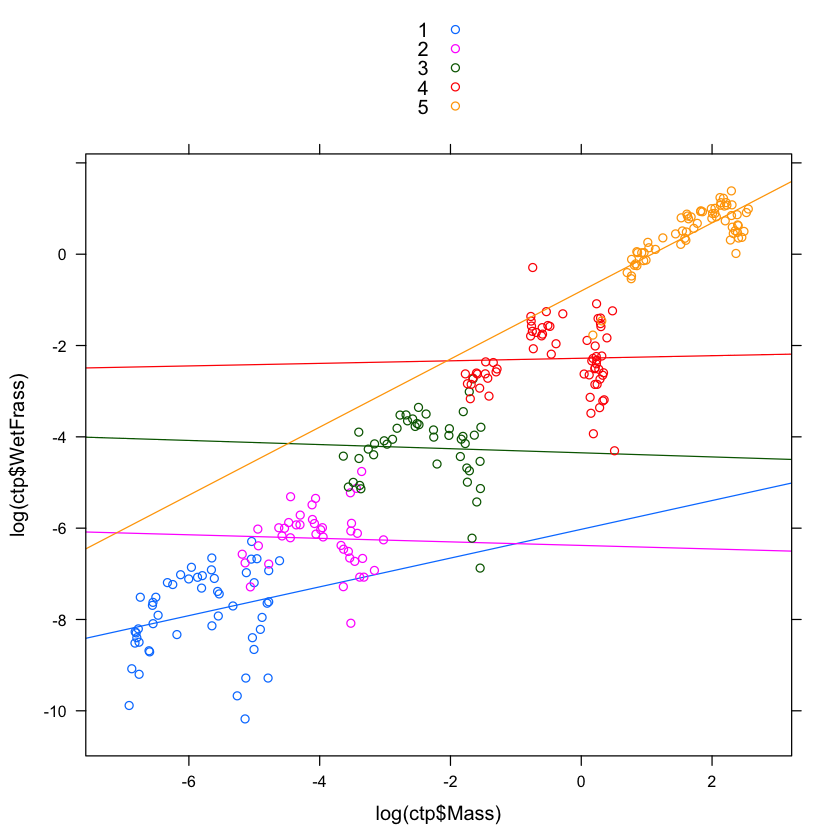

In [41]:
# qplot(x = Mass, y = WetFrass, data = ctp, color = Instar, main = "Title")
xyplot(log(ctp$WetFrass) ~ log(ctp$Mass), group=ctp$Instar, type=c('p', 'r'), auto.key=TRUE)

### I think that the fifth life stage follows the regression line in log transformed model the best but even it deviates, overestimating for smaller mass and earlier life stages. It seems that we should incorporate the instar variable into our model to make better predictions

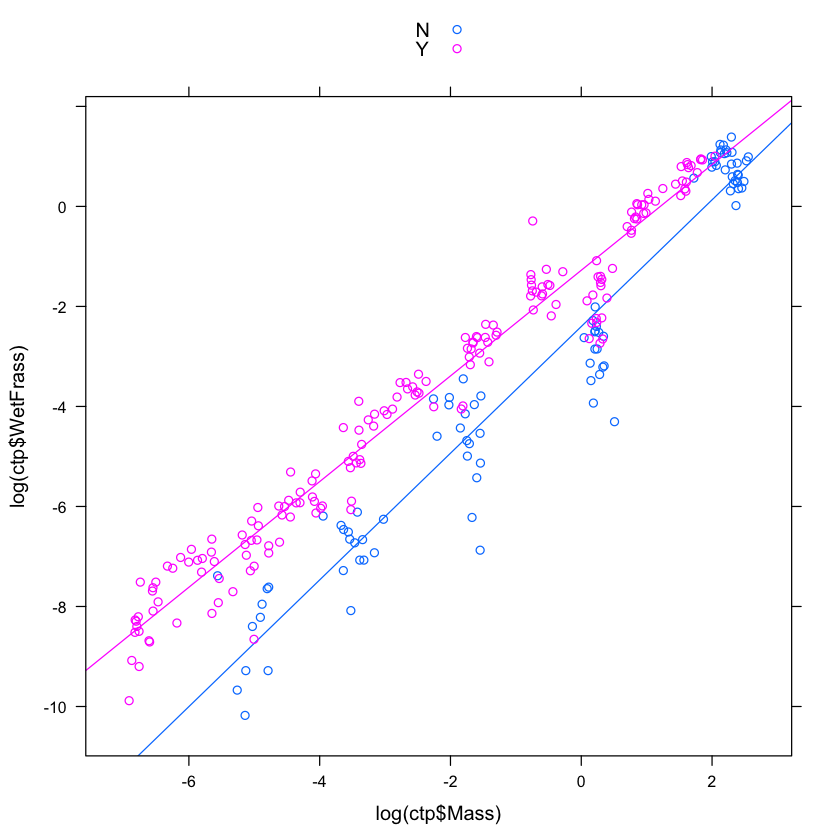

In [40]:
xyplot(log(ctp$WetFrass) ~ log(ctp$Mass), group=ctp$Fgp, type=c('p', 'r'), auto.key=TRUE)

### The first group follows a linear trend (the Y group) and the second doesn't. It seems to be stacked vertically rather than more linear 

### Problem 1.13

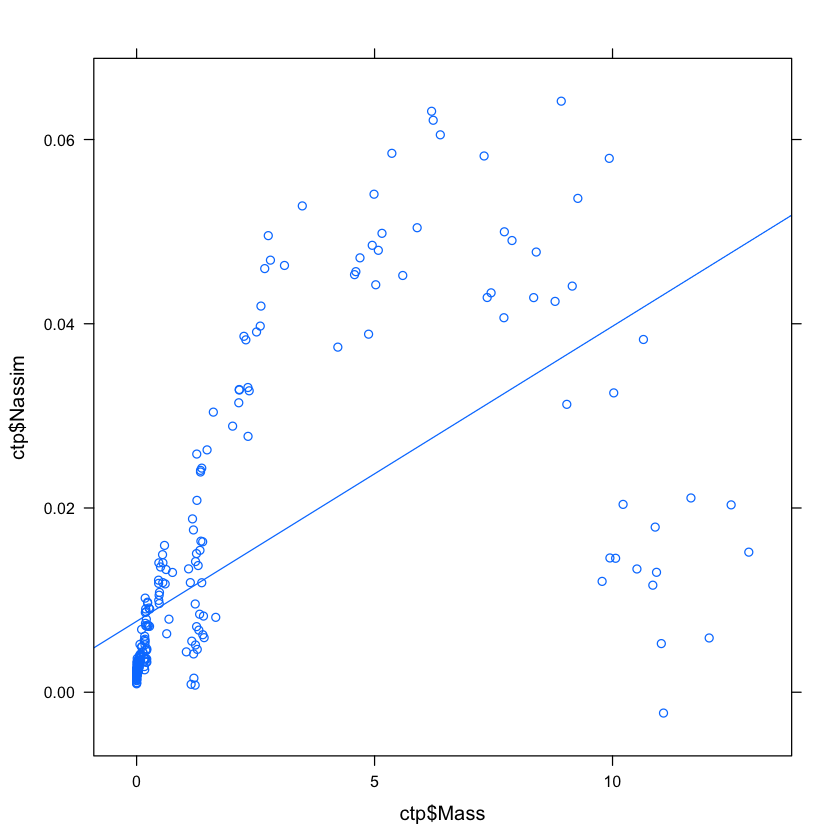

In [42]:
xyplot(ctp$Nassim ~ ctp$Mass, type=c('p','r'))

### a) This is definitely not linear. It might be more linear if we log transform it. It looks more polynomial than anything else.

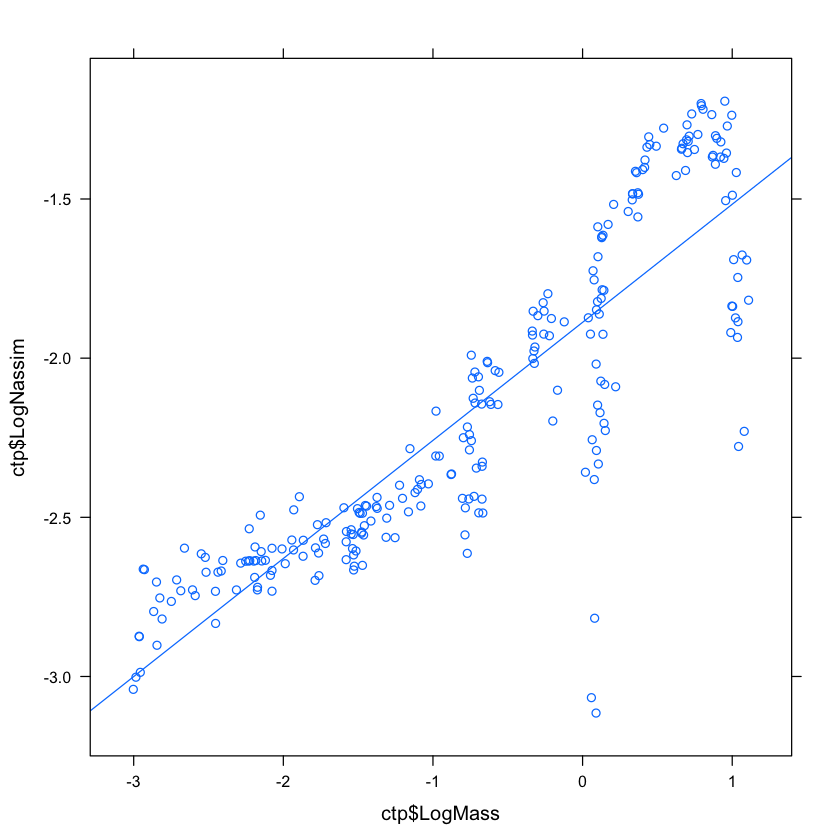

In [44]:
xyplot(ctp$LogNassim ~ ctp$LogMass, type=c('p','r'))

### b) This looks more linear but it looks like there is some underlying variable governing the variance, particularly at higher values of LogMass

### c) I prefer the second plot as it is more linear

In [49]:
massNassimLm = lm(ctp$LogWetFrass ~ ctp$LogMass)
summary(massNassimLm)


Call:
lm(formula = ctp$LogWetFrass ~ ctp$LogMass)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5392 -0.2063  0.1525  0.2906  0.9517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.73861    0.02977  -24.81   <2e-16 ***
ctp$LogMass  1.05361    0.02054   51.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4089 on 265 degrees of freedom
Multiple R-squared:  0.9085,	Adjusted R-squared:  0.9082 
F-statistic:  2632 on 1 and 265 DF,  p-value: < 2.2e-16


### Prediction Equation: $\log_{10}(\hat{Lassim}) = \beta_0 + \beta_1 \log_{10}(\text{Mass}) $, where $\beta_0 = -0.73861$ and $\beta_1 = 1.05361$